# Q1 What is regularization in the context of deep learning Why is it important


Regularization in Deep Learning:

Regularization in the context of deep learning is a set of techniques used to prevent a model from overfitting the training data. Overfitting occurs when a model learns not only the underlying patterns in the data but also the noise and outliers, which can lead to poor generalization on new, unseen data.

Importance of Regularization:

Regularization is essential because deep learning models, especially those with a large number of parameters, have a high capacity to memorize the training data. Without regularization, they might memorize the training set, including its noise, leading to poor performance on new data. Regularization techniques help to control the complexity of the model, ensuring that it generalizes well to unseen examples.

# Q2 Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff

Bias-Variance Tradeoff and Regularization:

The bias-variance tradeoff is a fundamental concept in machine learning. It refers to the tradeoff between bias (underfitting) and variance (overfitting). A model with high bias is too simplistic and may not capture the underlying patterns in the data, while a model with high variance is too complex and fits the noise in the data.

Regularization helps in addressing the bias-variance tradeoff by penalizing complex models. It discourages overly complex models by adding a penalty term to the loss function, which is a function of the model parameters. This penalty term prevents the model from assigning too much importance to any particular feature, thereby reducing variance.

# Q3 Describe the concept of l1 and l2 regularization. How do they differ in terms of penalty calculation and their effects on the modelG

L1 and L2 Regularization:

L1 Regularization (Lasso): Adds the sum of absolute values of the coefficients as a penalty term to the loss function. It encourages sparsity in the model by pushing some coefficients to exactly zero.


L2 Regularization (Ridge): Adds the sum of squared values of the coefficients as a penalty term to the loss function. It tends to shrink the coefficients towards zero but does not make them exactly zero.

λ is the regularization strength hyperparameter.

# Q4 Discuss the role of regularization in preventing overfitting and improving the generalization of deep learning models.

Regularization helps prevent overfitting by penalizing overly complex models during training. It effectively adds a constraint to the optimization problem, discouraging the model from fitting the noise in the training data. By controlling the model complexity, regularization improves the generalization performance of deep learning models on unseen data.

In summary, regularization is a crucial tool in deep learning to strike a balance between fitting the training data well and ensuring good generalization to new, unseen data. It is a key element in addressing the bias-variance tradeoff and preventing overfitting in complex models.

# Q5 Explain Dropout regularization and how it works to reduce overfitting. Discuss the impact of Dropout on model training and inference

Dropout Regularization:

Dropout is a regularization technique used to reduce overfitting in neural networks. The idea behind dropout is to randomly deactivate (drop out) a fraction of neurons during each training iteration. This means that during training, a random set of neurons is ignored, preventing them from contributing to the forward pass and backward pass computations.

How Dropout Works:

Training Phase:

During each training iteration, a random subset of neurons is dropped out. The dropout rate is a hyperparameter that determines the fraction of neurons to be dropped out, typically ranging from 0.2 to 0.5.
The network is trained with this random dropout, and the weights are updated accordingly.
Inference Phase:

During inference or testing, all neurons are active, but their outputs are scaled by the dropout rate. This scaling accounts for the fact that more neurons were active during training than during testing.
Impact of Dropout on Model Training and Inference:

Training: Dropout acts as a form of ensemble learning by training different subnetworks in each iteration. This helps prevent the network from relying too much on specific neurons, promoting robustness and reducing overfitting.

Inference: Since dropout is only applied during training, it is not used during inference. However, the learned weights are scaled to account for the dropout during training, ensuring a consistent behavior between training and inference.

# Q6 Describe the concept of Early ztopping as a form of regularization. How does it help prevent overfitting during the training process


Early Stopping:

Early stopping is a regularization technique where the training process is halted when the performance on a validation dataset stops improving. This is done by monitoring a specified metric (e.g., validation loss or accuracy) during training. If the performance on the validation set starts to degrade after an initial improvement, training is stopped to prevent overfitting

# Q7 Explain the concept of Batch Normalization and its role as a form of regularization. How does Batch Normalization help in preventing overfitting

Batch Normalization:

Batch Normalization (BatchNorm) is a regularization technique that normalizes the input of each layer in a mini-batch. It helps in preventing overfitting and accelerates training by reducing internal covariate shift.

How Batch Normalization Works:

Normalization: BatchNorm normalizes the input of each layer by subtracting the mini-batch mean and dividing by the mini-batch standard deviation.

Scaling and Shifting: The normalized values are then scaled by learnable parameters (gamma) and shifted by learnable parameters (beta).

Training and Inference: During training, BatchNorm uses the mini-batch statistics for normalization. During inference, running averages of mean and standard deviation are used, maintaining consistency between training and inference.

Impact of Batch Normalization on Preventing Overfitting:

Stabilizes Training: BatchNorm reduces internal covariate shift, making the training process more stable. This can help prevent overfitting, especially in deeper networks.

Regularization Effect: BatchNorm introduces a slight regularization effect due to the normalization of each mini-batch. This can have a similar effect to dropout in preventing overfitting.

In [38]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split


In [40]:
data,labels = make_moons(200,noise=0.2,random_state=2)

In [41]:
x_train_full, x_test, y_train_full, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
x_valid,x_train = train_test_split(x_test_full,test_size=0.4,random_state=42)
y_valid,y_train = train_test_split(y_test_full,test_size=0.4,random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

x_scaler = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=2))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [45]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [46]:
history = model.fit(x_scaler,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 1s 997ms/step - loss: 0.6633 - accuracy: 0.5833 - val_loss: 0.6927 - val_accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 43ms/step - loss: 0.6398 - accuracy: 0.8333 - val_loss: 0.6775 - val_accuracy: 0.7500
Epoch 3/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6177 - accuracy: 0.8333 - val_loss: 0.6628 - val_accuracy: 0.7500
Epoch 4/50
1/1 [==============================] - 0s 42ms/step - loss: 0.5971 - accuracy: 0.8333 - val_loss: 0.6490 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 41ms/step - loss: 0.5776 - accuracy: 0.8333 - val_loss: 0.6360 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 42ms/step - loss: 0.5596 - accuracy: 0.8333 - val_loss: 0.6233 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.5426 - accuracy: 0.8333 - val_loss: 0.6106 - val_accuracy: 1.0000
Epoch 8/50
1/1 [==========

In [47]:
model1 = Sequential()
model1.add(Dense(128,activation="relu",input_dim=2))
model1.add(Dropout(0.2))
model1.add(Dense(64,activation="relu"))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation="sigmoid"))

In [48]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [49]:
history = model1.fit(x_scaler,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.7295 - accuracy: 0.3333 - val_loss: 0.6775 - val_accuracy: 0.7500
Epoch 2/50
1/1 [==============================] - 0s 42ms/step - loss: 0.7372 - accuracy: 0.5000 - val_loss: 0.6662 - val_accuracy: 0.7500
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 0.7209 - accuracy: 0.4167 - val_loss: 0.6556 - val_accuracy: 0.7500
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 0.6971 - accuracy: 0.5000 - val_loss: 0.6447 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6707 - accuracy: 0.6667 - val_loss: 0.6340 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 41ms/step - loss: 0.6574 - accuracy: 0.5833 - val_loss: 0.6233 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 40ms/step - loss: 0.6327 - accuracy: 0.8333 - val_loss: 0.6126 - val_accuracy: 1.0000
Epoch 8/50
1/1 [=============

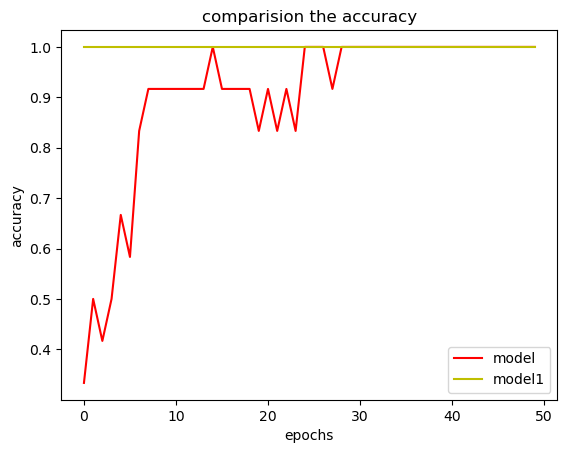

In [57]:
plt.plot(history.history["accuracy"],label="model",color="r")
plt.plot(history1.history["accuracy"],label="model1",color="y")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.title("comparision the accuracy")
plt.show()

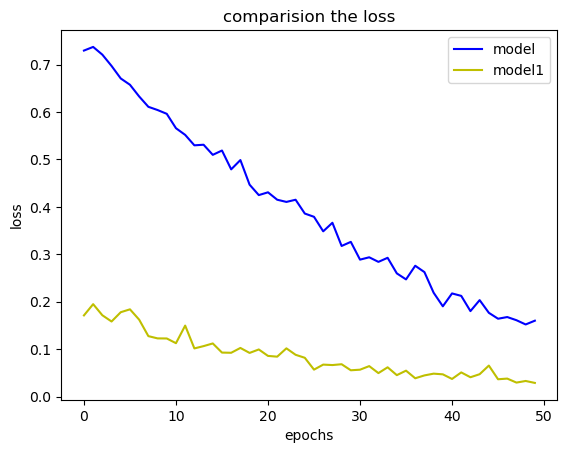

In [59]:
plt.plot(history.history["loss"],label="model",color="b")
plt.plot(history1.history["loss"],label="model1",color="y")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("comparision the loss")
plt.show()